In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
url_red = "E:\wine\wine\winequality-red.csv"
url_white = "E:\wine\wine\winequality-white.csv"
names_red = ("fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality")
names_white = ("fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality")
df1 = pd.read_csv(url_red, names = names_red)
df2 = pd.read_csv(url_white, names = names_white)
print(df1.head())
print(df2.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1            7.4               0.7            0             1.9      0.076   
2            7.8              0.88            0             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                   11                    34   0.9978  3.51       0.56   
2                   25                    67   0.9968   3.2       0.68   
3                   15                    54    0.997  3.26       0.65   
4                   17                    60    0.998  3.16       0.58   

   alcohol  quality  
0  alcohol  quality  
1      9.4        5  
2      9.8        5 

In [4]:
print(df1.tail())

     fixed acidity volatile acidity citric acid residual sugar chlorides  \
1595           6.2              0.6        0.08              2      0.09   
1596           5.9             0.55         0.1            2.2     0.062   
1597           6.3             0.51        0.13            2.3     0.076   
1598           5.9            0.645        0.12              2     0.075   
1599             6             0.31        0.47            3.6     0.067   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
1595                  32                   44   0.9949  3.45      0.58   
1596                  39                   51  0.99512  3.52      0.76   
1597                  29                   40  0.99574  3.42      0.75   
1598                  32                   44  0.99547  3.57      0.71   
1599                  18                   42  0.99549  3.39      0.66   

     alcohol quality  
1595    10.5       5  
1596    11.2       6  
1597      11       6  
1598  

In [5]:
print(df2.tail())

     fixed acidity volatile acidity citric acid residual sugar chlorides  \
4894           6.2             0.21        0.29            1.6     0.039   
4895           6.6             0.32        0.36              8     0.047   
4896           6.5             0.24        0.19            1.2     0.041   
4897           5.5             0.29         0.3            1.1     0.022   
4898             6             0.21        0.38            0.8      0.02   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
4894                  24                   92  0.99114  3.27       0.5   
4895                  57                  168   0.9949  3.15      0.46   
4896                  30                  111  0.99254  2.99      0.46   
4897                  20                  110  0.98869  3.34      0.38   
4898                  22                   98  0.98941  3.26      0.32   

     alcohol quality  
4894    11.2       6  
4895     9.6       5  
4896     9.4       6  
4897  

In [6]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1600 non-null   object
 1   volatile acidity      1600 non-null   object
 2   citric acid           1600 non-null   object
 3   residual sugar        1600 non-null   object
 4   chlorides             1600 non-null   object
 5   free sulfur dioxide   1600 non-null   object
 6   total sulfur dioxide  1600 non-null   object
 7   density               1600 non-null   object
 8   pH                    1600 non-null   object
 9   sulphates             1600 non-null   object
 10  alcohol               1600 non-null   object
 11  quality               1600 non-null   object
dtypes: object(12)
memory usage: 150.1+ KB
None


In [7]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         4899 non-null   object
 1   volatile acidity      4899 non-null   object
 2   citric acid           4899 non-null   object
 3   residual sugar        4899 non-null   object
 4   chlorides             4899 non-null   object
 5   free sulfur dioxide   4899 non-null   object
 6   total sulfur dioxide  4899 non-null   object
 7   density               4899 non-null   object
 8   pH                    4899 non-null   object
 9   sulphates             4899 non-null   object
 10  alcohol               4899 non-null   object
 11  quality               4899 non-null   object
dtypes: object(12)
memory usage: 459.4+ KB
None


In [8]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600
unique,97,144,81,92,154,61,145,437,90,97,66,7
top,7.2,0.6,0,2,0.08,6,28,0.9972,3.3,0.6,9.5,5
freq,67,47,132,156,66,138,43,36,57,69,139,681


In [9]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4899,4899,4899,4899,4899,4899,4899,4899,4899,4899,4899,4899
unique,69,126,88,311,161,133,252,891,104,80,104,8
top,6.8,0.28,0.3,1.2,0.044,29,111,0.992,3.14,0.5,9.4,6
freq,308,263,307,187,201,160,69,64,172,249,229,2198


In [10]:
df1.isnull()
df2.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False
4897,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1595    False
1596    False
1597     True
1598    False
1599    False
Length: 1600, dtype: bool

In [12]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4894    False
4895    False
4896    False
4897    False
4898    False
Length: 4899, dtype: bool

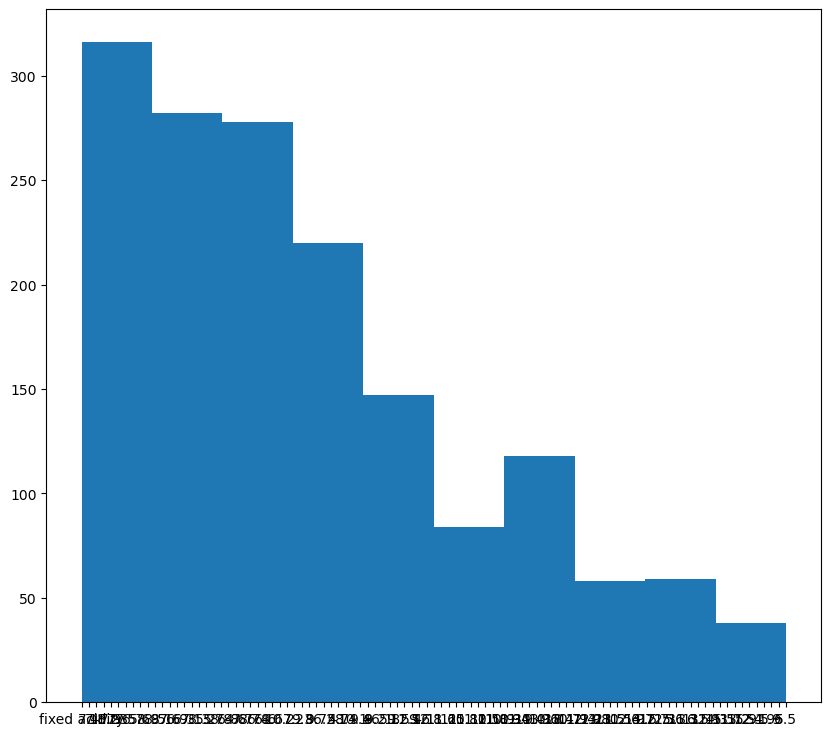

In [13]:
plt.figure(figsize=(10,9))
plt.hist(df1["fixed acidity"])
plt.show()

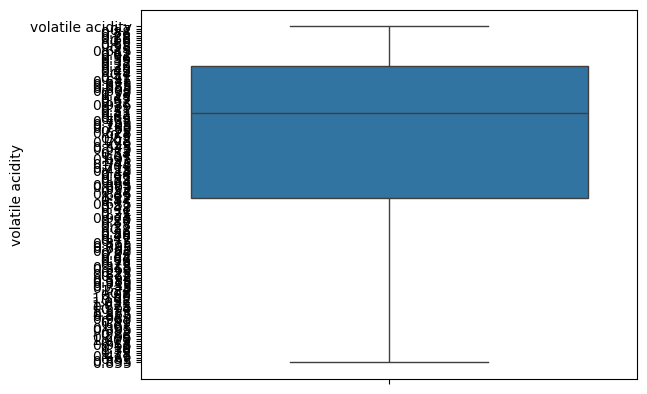

In [14]:
sns.boxplot(df1["volatile acidity"])
plt.show()

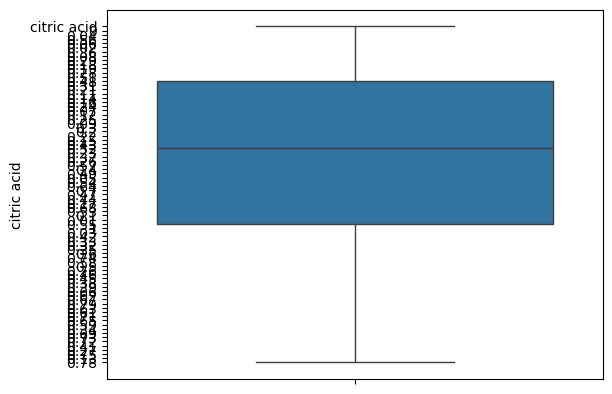

In [15]:
sns.boxplot(df1["citric acid"])
plt.show()

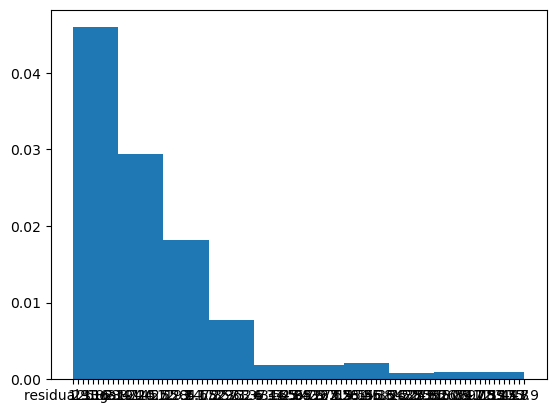

In [16]:
plt.hist(df1["residual sugar"], density = True)
plt.show()

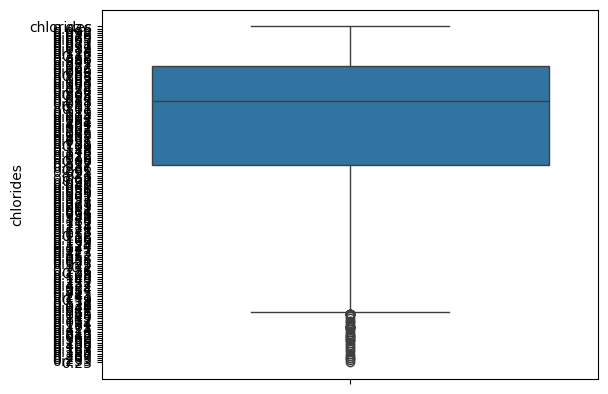

In [17]:
sns.boxplot(df1['chlorides'])
plt.show()

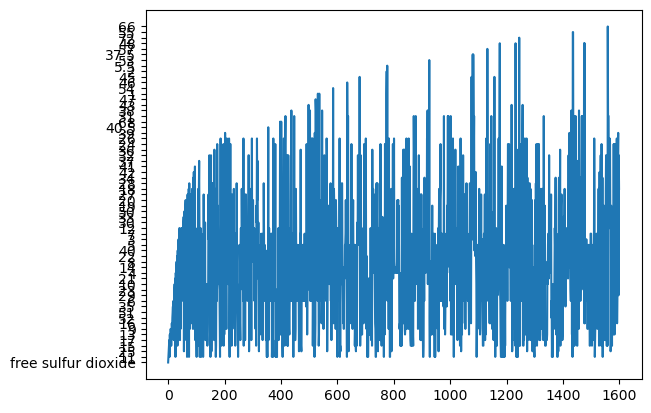

In [18]:
plt.plot(df1['free sulfur dioxide'])
plt.show()

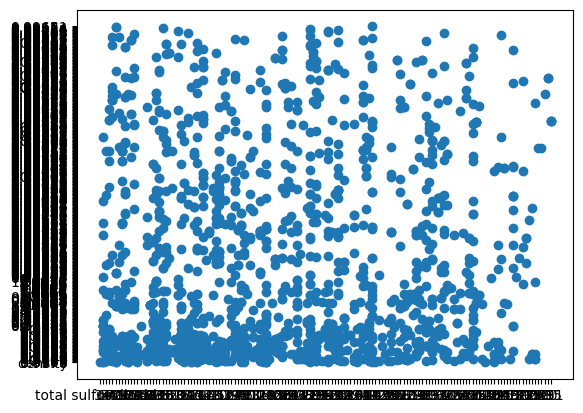

In [19]:
plt.scatter(df1["total sulfur dioxide"], df1["density"])
plt.show()

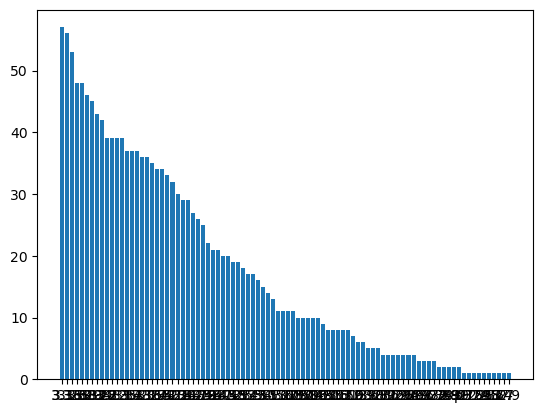

In [20]:
counts = df1["pH"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

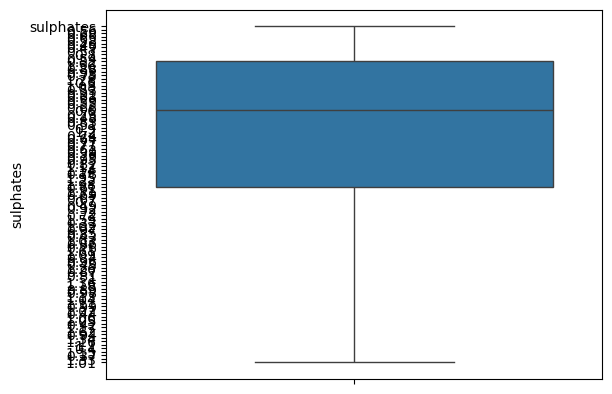

In [21]:
sns.boxplot(df1['sulphates'])
plt.show()

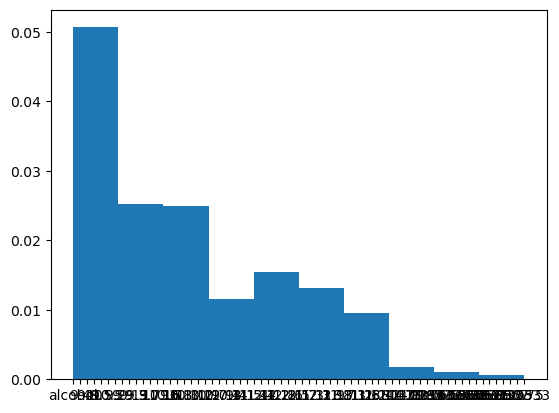

In [22]:
plt.hist(df1["alcohol"], density = True)
plt.show()

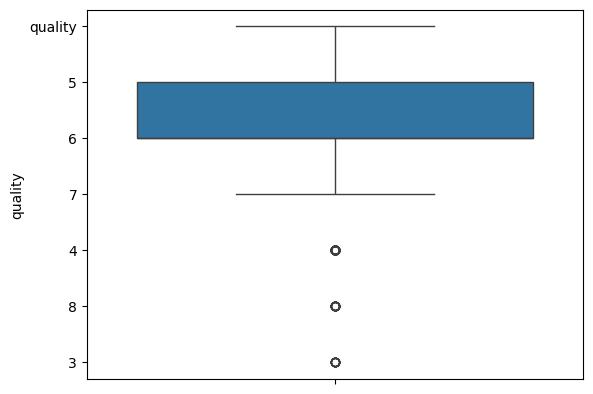

In [23]:
sns.boxplot(df1["quality"])
plt.show()

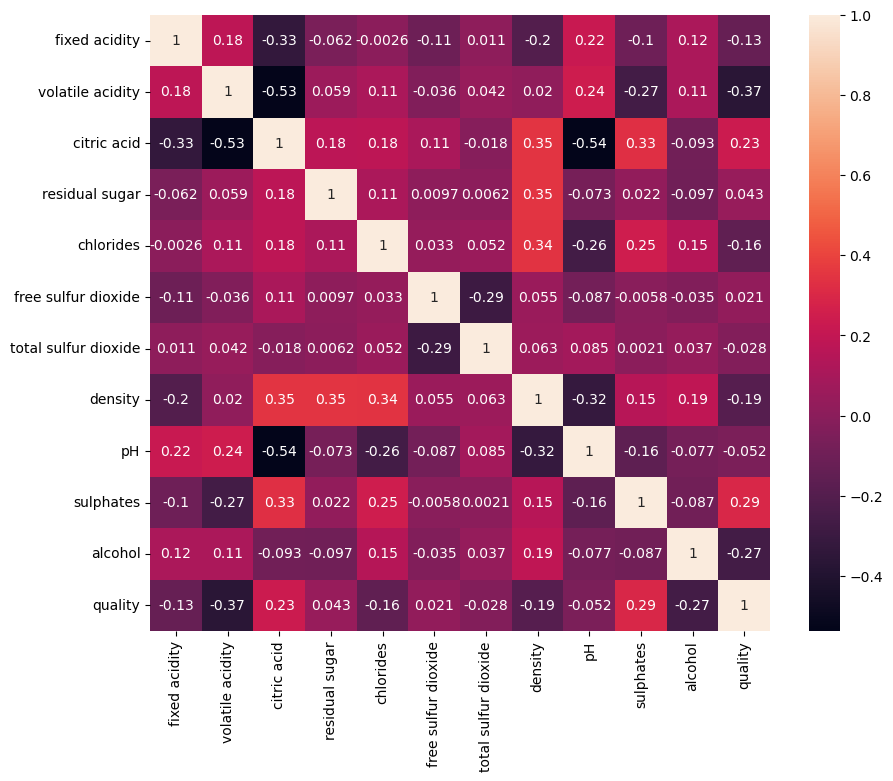

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

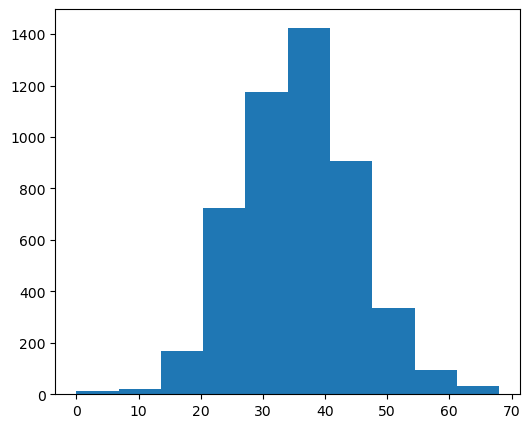

In [71]:
plt.figure(figsize=(6,5))
plt.hist(df2["fixed acidity"])
plt.show()

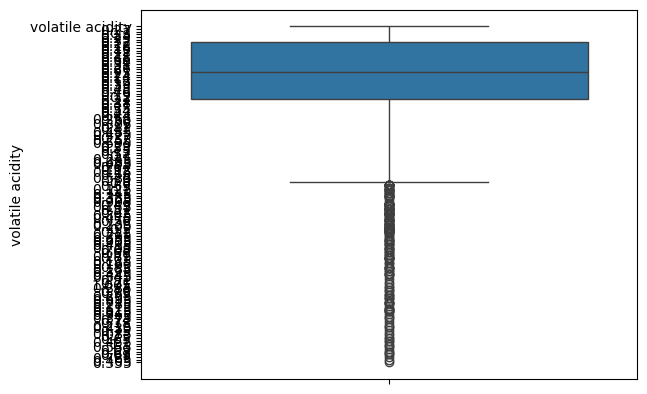

In [35]:
sns.boxplot(df2["volatile acidity"])
plt.show()

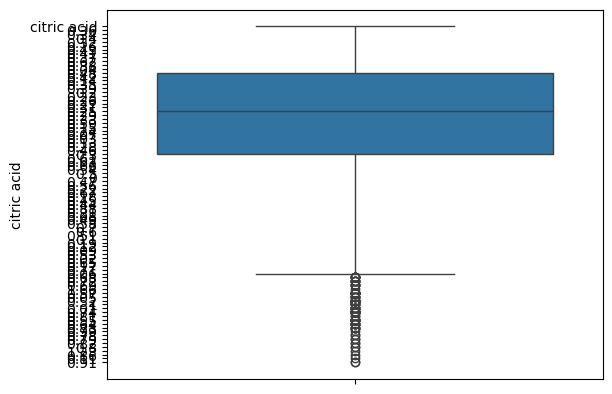

In [36]:
sns.boxplot(df2["citric acid"])
plt.show()

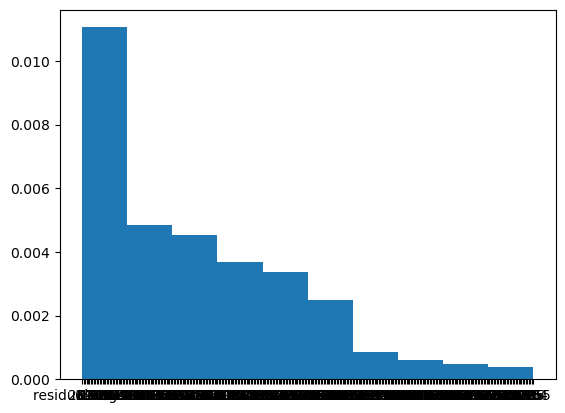

In [37]:
plt.hist(df2["residual sugar"], density = True)
plt.show()

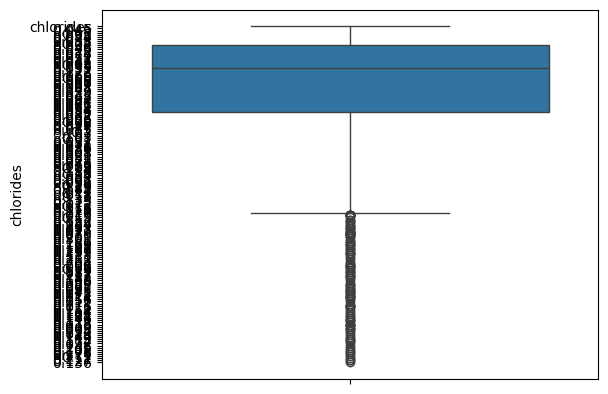

In [38]:
sns.boxplot(df2['chlorides'])
plt.show()

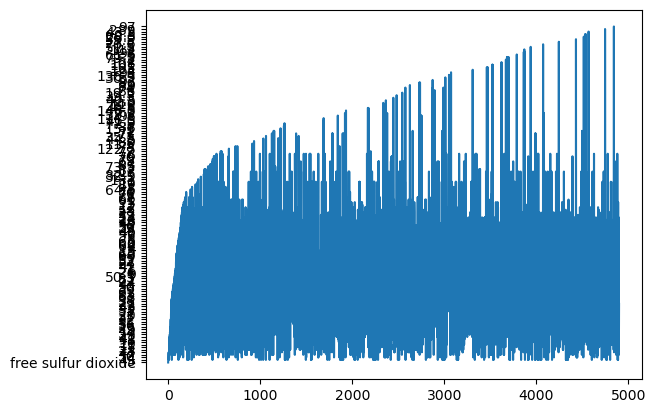

In [39]:
plt.plot(df2['free sulfur dioxide'])
plt.show()

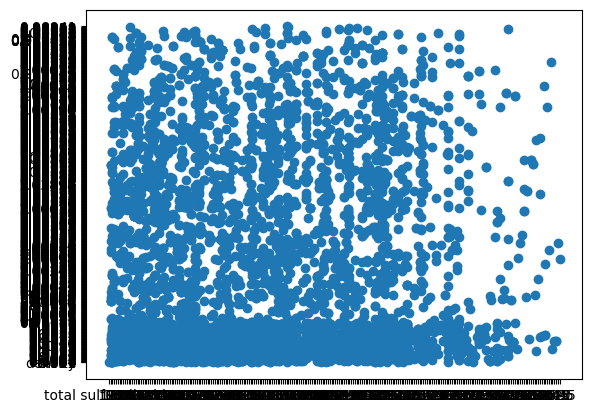

In [40]:
plt.scatter(df2["total sulfur dioxide"], df2["density"])
plt.show()

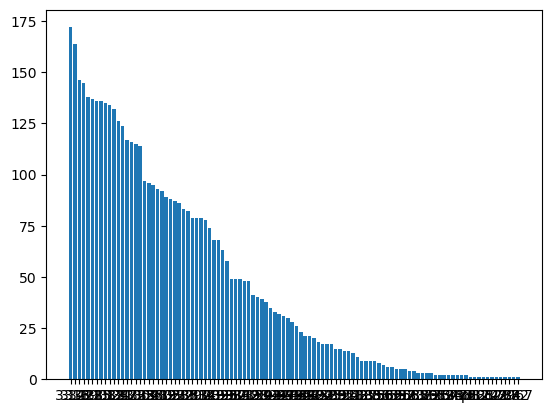

In [41]:
counts = df2["pH"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

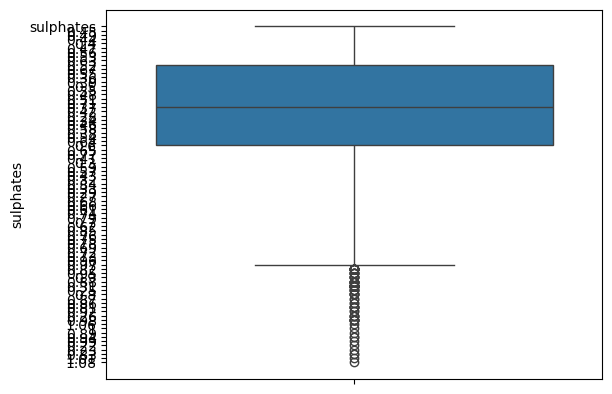

In [42]:
sns.boxplot(df2['sulphates'])
plt.show()

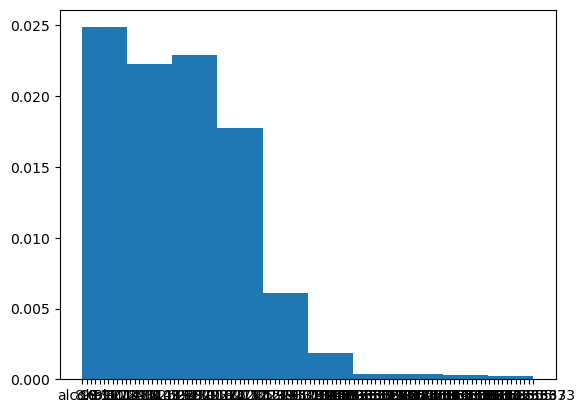

In [43]:
plt.hist(df2["alcohol"], density = True)
plt.show()

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
x = df1.drop("quality", axis=1)
y = df1['quality']
col =ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), x.columns)
], remainder='passthrough')
x = col.fit_transform(x)

In [45]:
print(df1['fixed acidity'].head())

0    fixed acidity
1              7.4
2              7.8
3              7.8
4             11.2
Name: fixed acidity, dtype: object


In [46]:
le = LabelEncoder()
df1['quality'] = le.fit_transform(df1['quality'])
print(df1['quality'].head())

0    6
1    2
2    2
3    2
4    3
Name: quality, dtype: int64


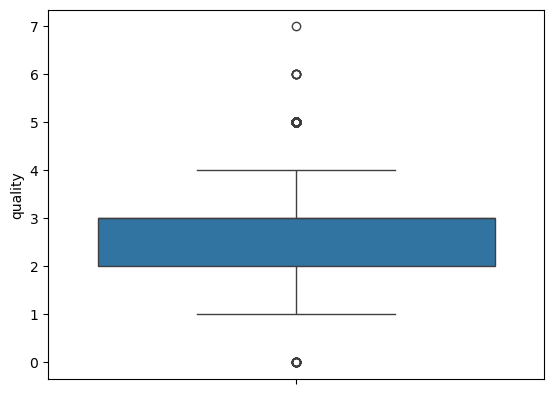

In [67]:
sns.boxplot(df2["quality"])
plt.show()

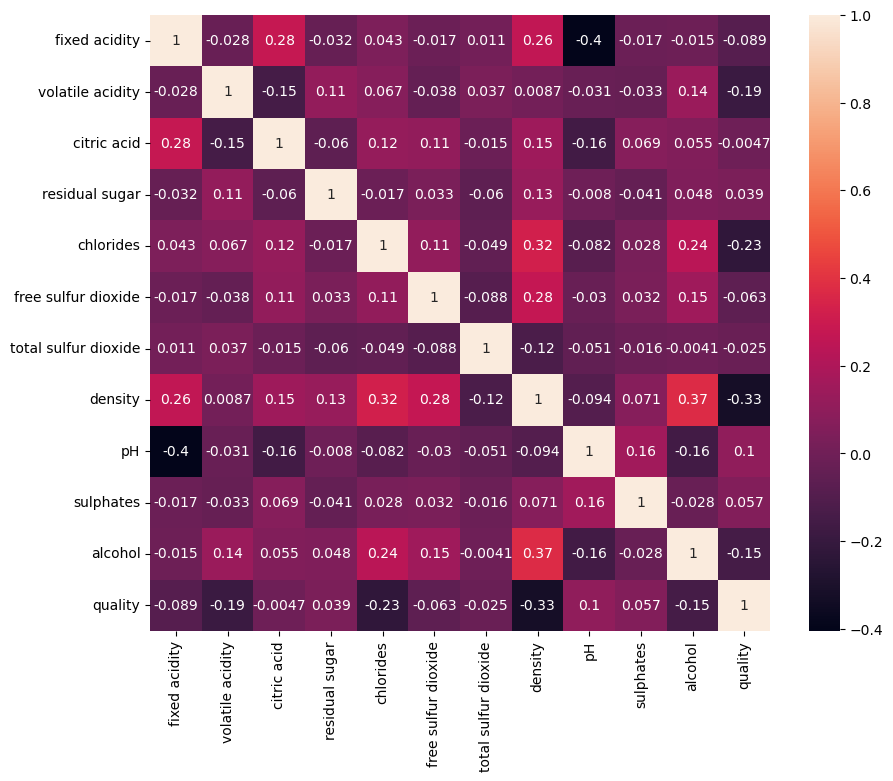

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [66]:
le = LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = le.fit_transform(df1[col])

print(df1.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             96               143           80              91        153   
1             70                76            0              10         39   
2             74               112            0              30         61   
3             74                88            4              25         55   
4             12                12           56              10         38   

   free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  alcohol  \
0                   60                   144      436  89         96       65   
1                    2                    74      342  63         18       56   
2                   17                   108      271  32         30       62   
3                    6                    94      287  38         27       62   
4                    8                   101      354  28         20       62   

   quality  
0        6  
1        2  
2    

In [50]:
x = df1.drop(['quality'], axis=1)
y = df1['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Intercept:  3.1366849012470253
Slope:  [-2.02642700e-03 -5.63619749e-03  5.42906897e-03  4.73905949e-03
 -2.78306263e-03  1.29046814e-05  1.09699560e-03 -1.92364803e-03
 -7.56488696e-05  1.11515865e-02 -4.17169728e-03]
R2 Score: 0.3350351973306379
MSE: 0.44603437701273385
RMSE:  0.6678580515444384


In [51]:
x = df1.drop(['quality'], axis=1)
y = df1['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = DecisionTreeRegressor(random_state = 42)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Decision Tree Regression Results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Decision Tree Regression Results: 
R2 Score: -0.17870259666807486
MSE: 0.7145833333333333
RMSE:  0.8453303101943839


In [52]:
x = df1.drop(['quality'], axis=1)
y = df1['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = RandomForestRegressor(random_state = 42)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regression Results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Random Forest Regression Results: 
R2 Score: 0.4373669690934572
MSE: 0.3972716666666667
RMSE:  0.6302949045222138


In [53]:
x = df1.drop(['quality'], axis=1)
y = df1['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = GradientBoostingRegressor(random_state = 42)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting Regression Results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Gradient Boosting Regression Results: 
R2 Score: 0.4239496596590179
MSE: 0.3535408955103136
RMSE:  0.5945930503380557


In [54]:
x = df1.drop(['quality'], axis=1)
y = df1['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = QuantileRegressor()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Quantile Regression Results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Quantile Regression Results: 
R2 Score: 0.18609884629116258
MSE: 0.4774568838287012
RMSE:  0.690982549583346


In [55]:
scaler = StandardScaler()
x_train_sclaed = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [56]:
from sklearn.svm import SVR
x = df1.drop(['quality'], axis=1)
y = df1['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = SVR()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Support Vector Regressor Results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Support Vector Regressor Results: 
R2 Score: 0.26939646211696433
MSE: 0.5067769288488599
RMSE:  0.7118826650852371


In [57]:
from sklearn.neighbors import KNeighborsRegressor
x = df1.drop(['quality'], axis=1)
y = df1['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = KNeighborsRegressor()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("KNeighbors Regressor Results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

KNeighbors Regressor Results: 
R2 Score: 0.2825160847839575
MSE: 0.47675000000000006
RMSE:  0.6904708538381618


In [58]:
le = LabelEncoder()
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = le.fit_transform(df2[col])

print(df1.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             96               143           80              91        153   
1             70                76            0              10         39   
2             74               112            0              30         61   
3             74                88            4              25         55   
4             12                12           56              10         38   

   free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  alcohol  \
0                   60                   144      436  89         96       65   
1                    2                    74      342  63         18       56   
2                   17                   108      271  32         30       62   
3                    6                    94      287  38         27       62   
4                    8                   101      354  28         20       62   

   quality  
0        6  
1        2  
2    

In [59]:
x = df2.drop(['quality'], axis=1)
y = df2['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Intercept:  3.5077699220038623
Slope:  [ 0.00031727 -0.00892047  0.00253319  0.00087749 -0.00606498  0.00022768
 -0.00046321 -0.00128702  0.00359999  0.00537809  0.00043331]
R2 Score: 0.13891559586134095
MSE: 0.7180939449579937
RMSE:  0.8474042394028919


In [60]:
x = df2.drop(['quality'], axis=1)
y = df2['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = KNeighborsRegressor()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("KNeighbors Regressor results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

KNeighbors Regressor results: 
R2 Score: 0.26824410968026835
MSE: 0.5735782312925171
RMSE:  0.75734947764722


In [61]:
x = df2.drop(['quality'], axis=1)
y = df2['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = SVR()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Support Vector Regressor results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Support Vector Regressor results: 
R2 Score: 0.28834696255394365
MSE: 0.5575392682988405
RMSE:  0.7466855216882409


In [62]:
x = df2.drop(['quality'], axis=1)
y = df2['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = DecisionTreeRegressor()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Decision Tree Regressor results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Decision Tree Regressor results: 
R2 Score: -0.0159483897484074
MSE: 0.7687074829931972
RMSE: 0.8767596495010461


In [63]:
x = df2.drop(['quality'], axis=1)
y = df2['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = RandomForestRegressor()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regressor results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

Random Forest Regressor results: 
R2 Score: 0.4823024046828486
MSE: 0.4200039455782313
RMSE:  0.64807711391333


In [64]:
x = df2.drop(['quality'], axis=1)
y = df2['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = QuantileRegressor()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Quantile Regressor results: " )
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Quantile Regressor results: 
R2 Score: -0.011314055950037982
MSE: 0.787755102040816


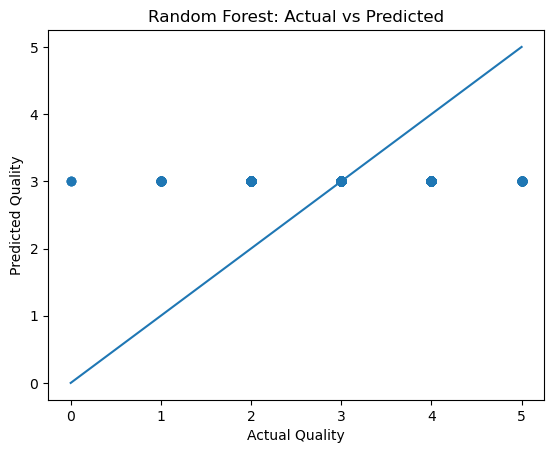

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-')
plt.show()